# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [5]:
# Import your libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0    (2.2301004695189732, 0.32789880656816633)
1     (0.5006656306785072, 0.7785416293521347)
2    (1.9530934636598962, 0.37660938910495195)
3     (4.409267109029358, 0.11029093351498832)
4    (0.03286140109164942, 0.9837035471475386)
dtype: object

#### Interpret the normaltest results and make your observations.

In [ ]:
# Explain the test results here
# el primer valor devuelto de la tupla debería ser más cercano al valor 0
# el p-valor debería ser más alto que 0.05 para no poder rechazar la hipótesis
# de que sean una normal

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

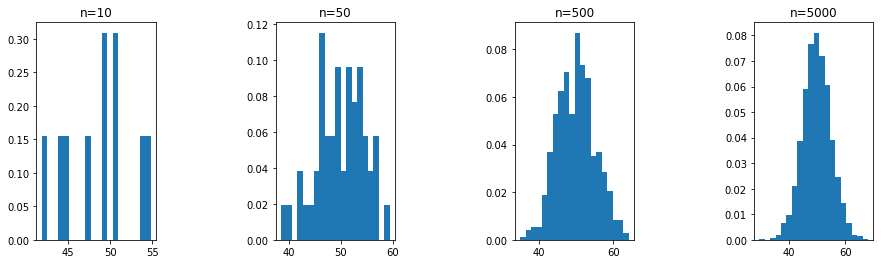

In [113]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Your comment and explanation here
# Observamos que cuanto mayor sea el número de muestras
# más se asemeja a una distribución normal

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

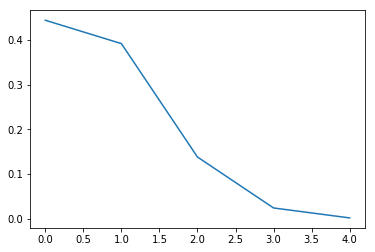

In [114]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [ ]:
# Your comment here
# Observamos que la probabilidad de que una persona le de al anuncio
# decrece con el numero de personas totales, es decir que es mucho más
# probable que ninguna persona le de al anuncio que alguna o más personas

#### Now plot PMP with 50, 500, and 5000 visitors.

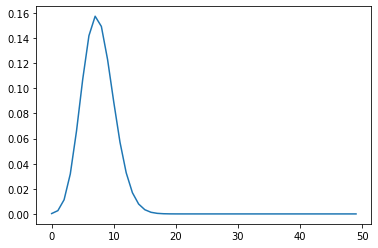

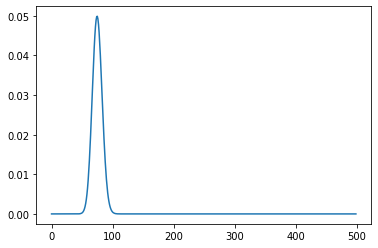

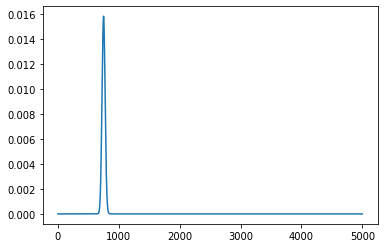

In [33]:
# Your code here
from scipy.stats import binom


n_m=[50,500,5000]
x_m=[range(e) for e in n_m]
dist_m=[binom(e,p) for e in n_m]

for i in range(3):
    f, ax = plt.subplots(1, 1)
    plt.plot(x_m[i],dist_m[i].pmf(x_m[i]))
    plt.show()



#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here
# la mayor probabilidad se encuentra en 0.15*n
# Es decir que lo más probable es que 0.15*n personas le den al anuncio
# Cuanto mayor sea la n nuestra distribución es más ancha, ya que 
# la probabilidad de que sea 0.15*n es menor

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here
# Es una distribución de probabilidad discreta en la cual define 
# el número de veces que ocurre un evento en un intervalo de tiempo
# o de espacio

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [35]:
# Your code here
stats.poisson.pmf(320,300)


0.011612348610402475

#### What is the probability of getting 60 visits?

In [36]:
# Your code here
stats.poisson.pmf(60,300)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

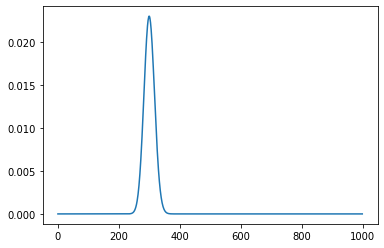

In [37]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)